# Viability

Andreas Svendsen

# Viability

## Setup

In [ ]:
#| message: false
#| warning: false

# Always load same package versions
groundhog.day <- "2024-01-01"
groundhog::meta.groundhog(groundhog.day) 

Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript

Successfully attached 'data.table_1.14.10'

Successfully attached 'ggplot2_3.4.4'

Successfully attached 'patchwork_1.1.3'

Successfully attached 'here_1.0.1'

Successfully attached 'RColorBrewer_1.1-3'

## Load and wrangle data

In [ ]:
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))

# Convert 'day' to a factor
data[, day := as.factor(day)]

# Calculate the mean ATP for each donor on day 5
mean_day5 <- data[day == 5, .(mean_ATP_day5 = mean(ATP)), by = .(donor)]

# Merge this back with the main data
data <- merge(data, mean_day5, by = "donor")

# Calculate the relative ATP
data[, relative_ATP := ATP / mean_ATP_day5]

# Calculate the mean relative ATP for each donor and day
mean_data <- data[, .(mean_relative_ATP = mean(relative_ATP)), by = .(day, donor)]

# Calculate the overall mean across all donors for each day
overall_mean <- mean_data[, .(overall_mean_ATP = mean(mean_relative_ATP)), by = day]

## Plotting

#### Overall relative viability

In [ ]:
# Plotting
plot_relative_viability <- 
ggplot() +
  geom_point(data = mean_data,
             mapping = aes(x = day, y = mean_relative_ATP, color = as.factor(donor))) +
  geom_point(data = overall_mean,
             mapping = aes(x = day, y = overall_mean_ATP),
             size = 5,
             alpha = 0.5) +
  labs(title = "Mean ATP Relative to Day 5 Across Donors",
       x = "Day",
       y = "Mean Relative ATP") +
  scale_y_continuous(
    name = "Relative viability",
    limits = c(0, NA)
  )

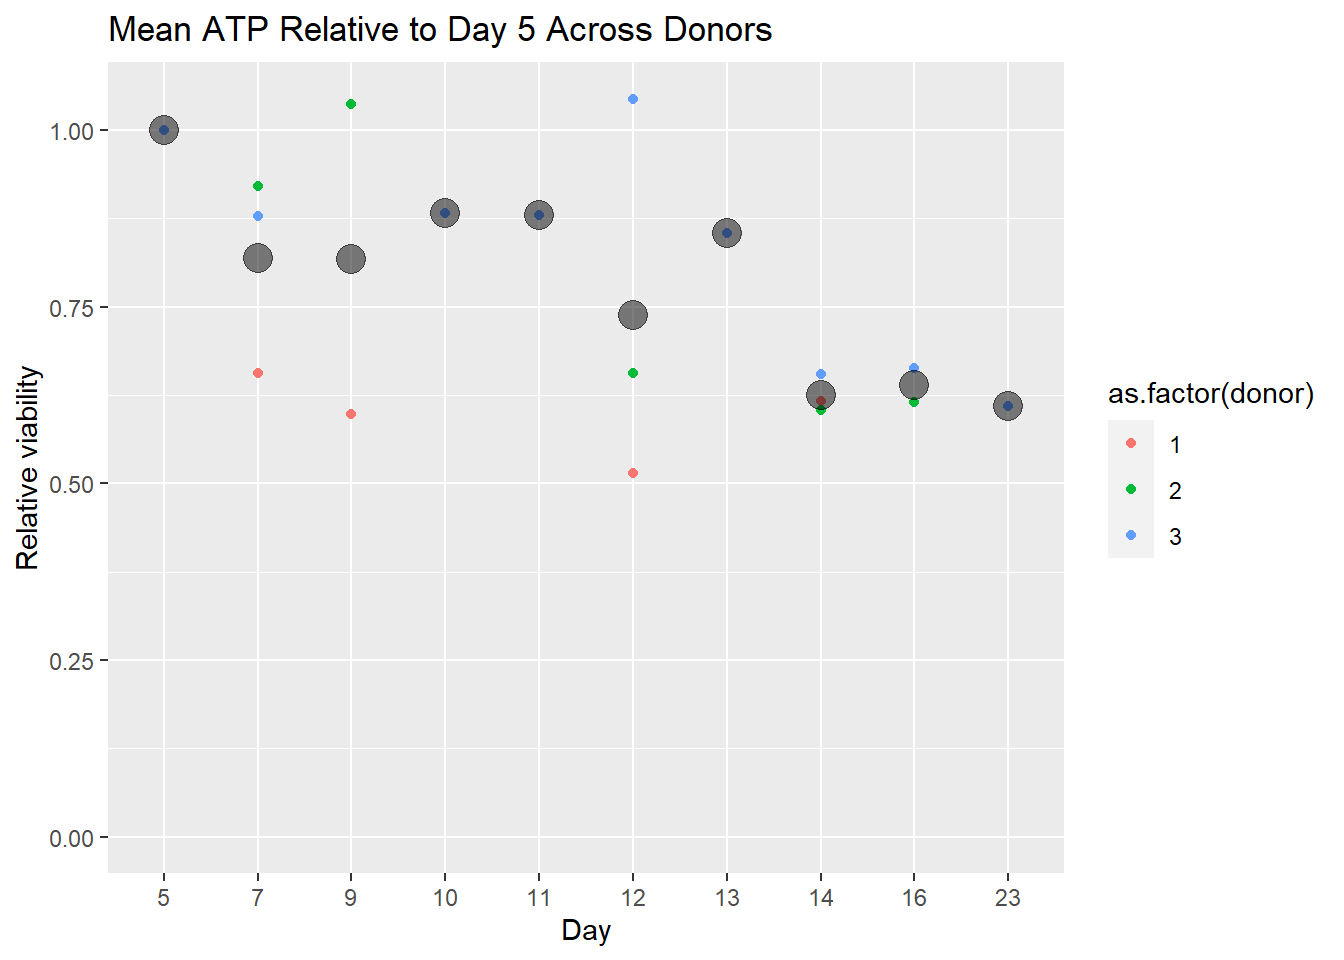

In [ ]:
#| label: fig-viability-relative-overall
#| fig-cap: "Note that the concentration of ATP of donor one on day 5 was to high. Data for this donor/day not trustworthy/viability to high. This yields a steep fall from day 5 to 7"
plot_relative_viability

#### Overall absolute viability

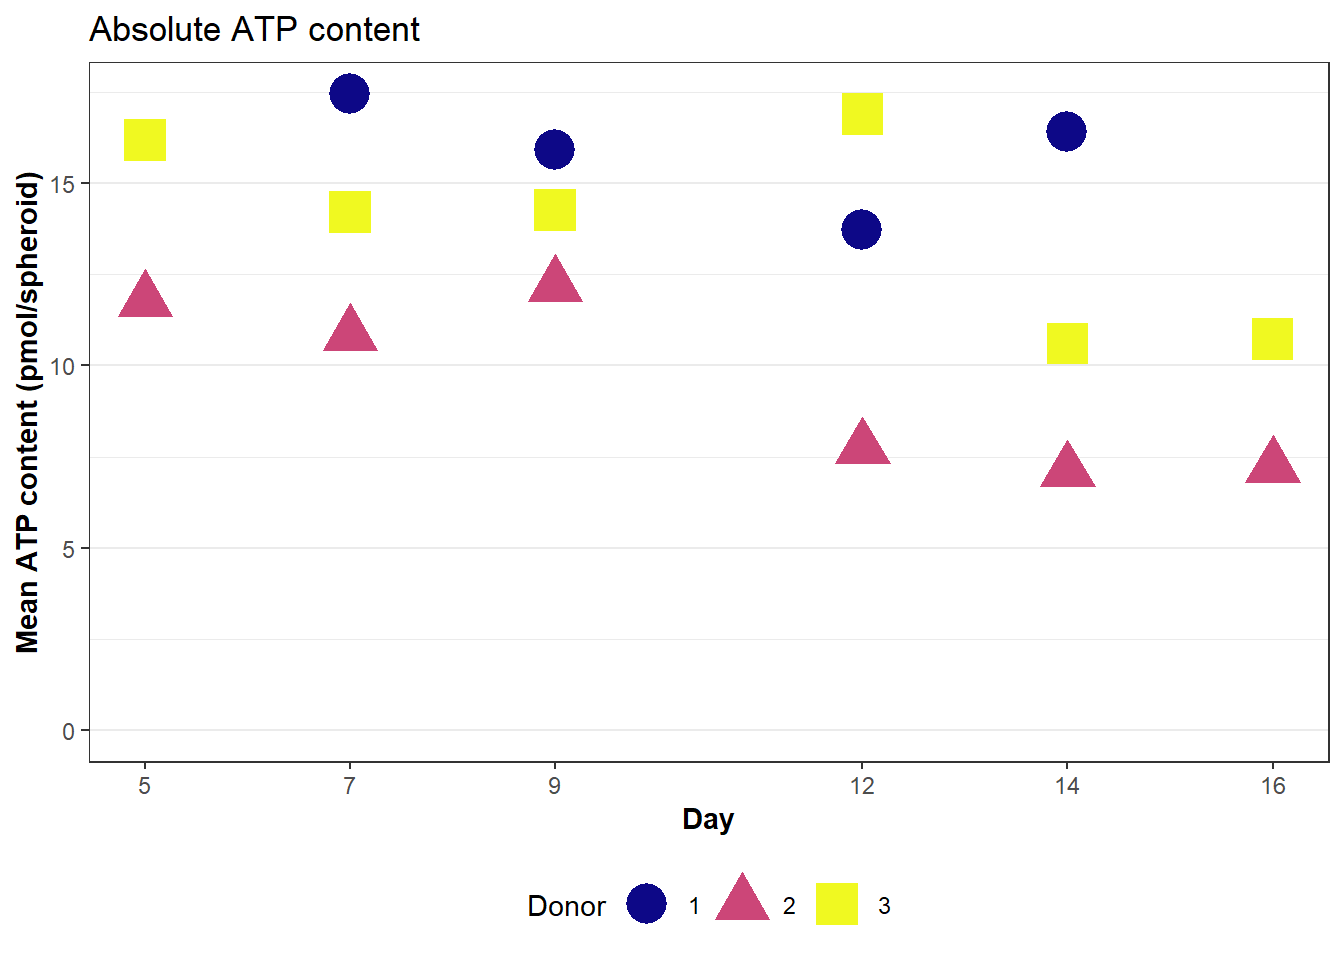

In [ ]:
# read processed data
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))

# Caclulate mean ATP by day and donor
mean_ATP <- data[, .(mean_ATP = mean(ATP, na.rm = TRUE)), by = .(day, donor)]

# Set for donor 3 day 9 was measured on day 10. 
mean_ATP[day == 10, day := 9]

# Keep only day 5, 7, 9, 12, 14, and 16
mean_ATP <- mean_ATP[day %in% c(5, 7, 9, 12, 14, 16)]
mean_ATP <- mean_ATP[!(donor == 1 & day == 5)]

plot_viability <- 
  ggplot(data = mean_ATP, 
         aes(x = day, 
             y = mean_ATP, 
             color = as.factor(donor),
             shape = as.factor(donor))) +
  geom_point(size = 7) +
  #scale_color_brewer(palette = "Set2") +
  scale_color_viridis_d(option = "plasma") +
  labs(title = "Absolute ATP content",
       x = "Day",
       y = "Mean ATP content (pmol/spheroid)",
       color = "Donor",  # Rename the legend title
       shape = "Donor") +  # Ensure this is the same as color
  guides(color = guide_legend(), shape = guide_legend()) +  # Combine color and shape legends
  scale_y_continuous(limits = c(0, NA)) +
  scale_x_continuous(breaks = c(5, 7, 9, 12, 14, 16)) +
  theme_bw() +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        legend.position = "bottom",
        axis.title = element_text(face = "bold"))  

plot_viability

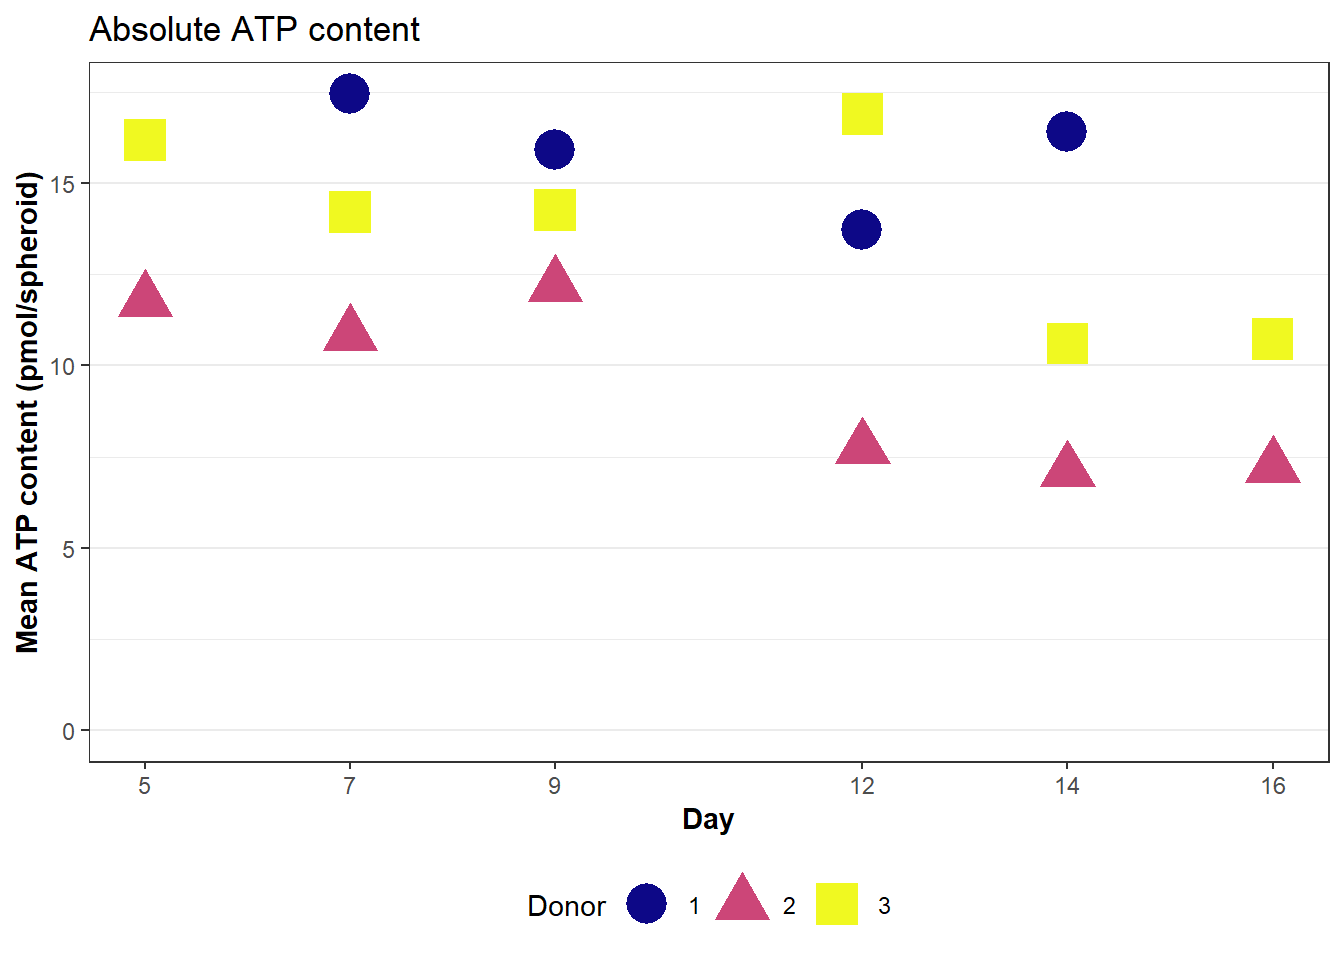

In [ ]:
#| label: fig-viability
#| fig-cap: "Each point is the mean ATP content of 5-8 spheroids/replicates (mean = 7). Missing data for for donor 1 on day 5 and 16. Data for donor 3 day 9 was measured on day 10"

plot_viability

Number of replicates:

In [ ]:
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))

# Keep only day 5, 7, 9, 12, 14, and 16 + 10 since donor 3 was measured on that day instead of day 9, also explude donor 1 day 5. 
# Replicates ranges from 5-8 with a mean of 7. 

data[day %in% c(5, 7, 9, 10, 12, 14, 16) 
     & !(donor == 1 & day == 5),
     .(.N),
     by = .(donor, day)
     ]

    donor day N
 1:     1   7 5
 2:     1   9 7
 3:     1  12 6
 4:     1  14 8
 5:     2   5 7
 6:     2   7 7
 7:     2   9 7
 8:     2  12 7
 9:     2  14 6
10:     2  16 6
11:     3   5 8
12:     3   7 8
13:     3  10 8
14:     3  12 8
15:     3  14 8
16:     3  16 8

[1] 7.125

### Plot individual donors

In [ ]:
# Load data ---------------------------------------------------------------
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))


#### Donor 1 ####
donor_1 <- data[donor == 1]

donor_1[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_1[day == 5, mean_ATP][1]

donor_1[, relative_ATP := ATP / calibrator]

plot_donor_1 <- 
ggplot(
  data = donor_1,
  aes(
    x=as.factor(day),
    y = relative_ATP
    )
  ) +
  geom_point() +
  stat_summary(fun = mean, color = "red") +
  scale_y_continuous(name = "ATP content relative to day 5", limits = c(0, 1.5))


#### Donor 2 ####
donor_2 <- data[donor == 2]

donor_2[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_2[day == 5, mean_ATP][1]

donor_2[, relative_ATP := ATP / calibrator]

plot_donor_2 <- 
ggplot(
  data = donor_2,
  aes(
    x=as.factor(day),
    y = relative_ATP
  )
) +
  geom_point() +
  stat_summary(fun = mean, color = "red") +
  scale_y_continuous(limits = c(0, 1.5))


#### Donor 3 ####
donor_3 <- data[donor == 3]

donor_3[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_3[day == 5, mean_ATP][1]

donor_3[, relative_ATP := ATP / calibrator]

plot_donor_3 <- 
ggplot(
  data = donor_3,
  aes(
    x=as.factor(day),
    y = relative_ATP
  )
) +
  geom_point() +
  stat_summary(fun = mean, color = "red")+
  scale_y_continuous(limits = c(0, 1.5))


plot_donor_relative_viability <- 
  wrap_plots(list(plot_donor_1, plot_donor_2, plot_donor_3)) +
  plot_annotation(title = "Individual donor viability relative to day 5")

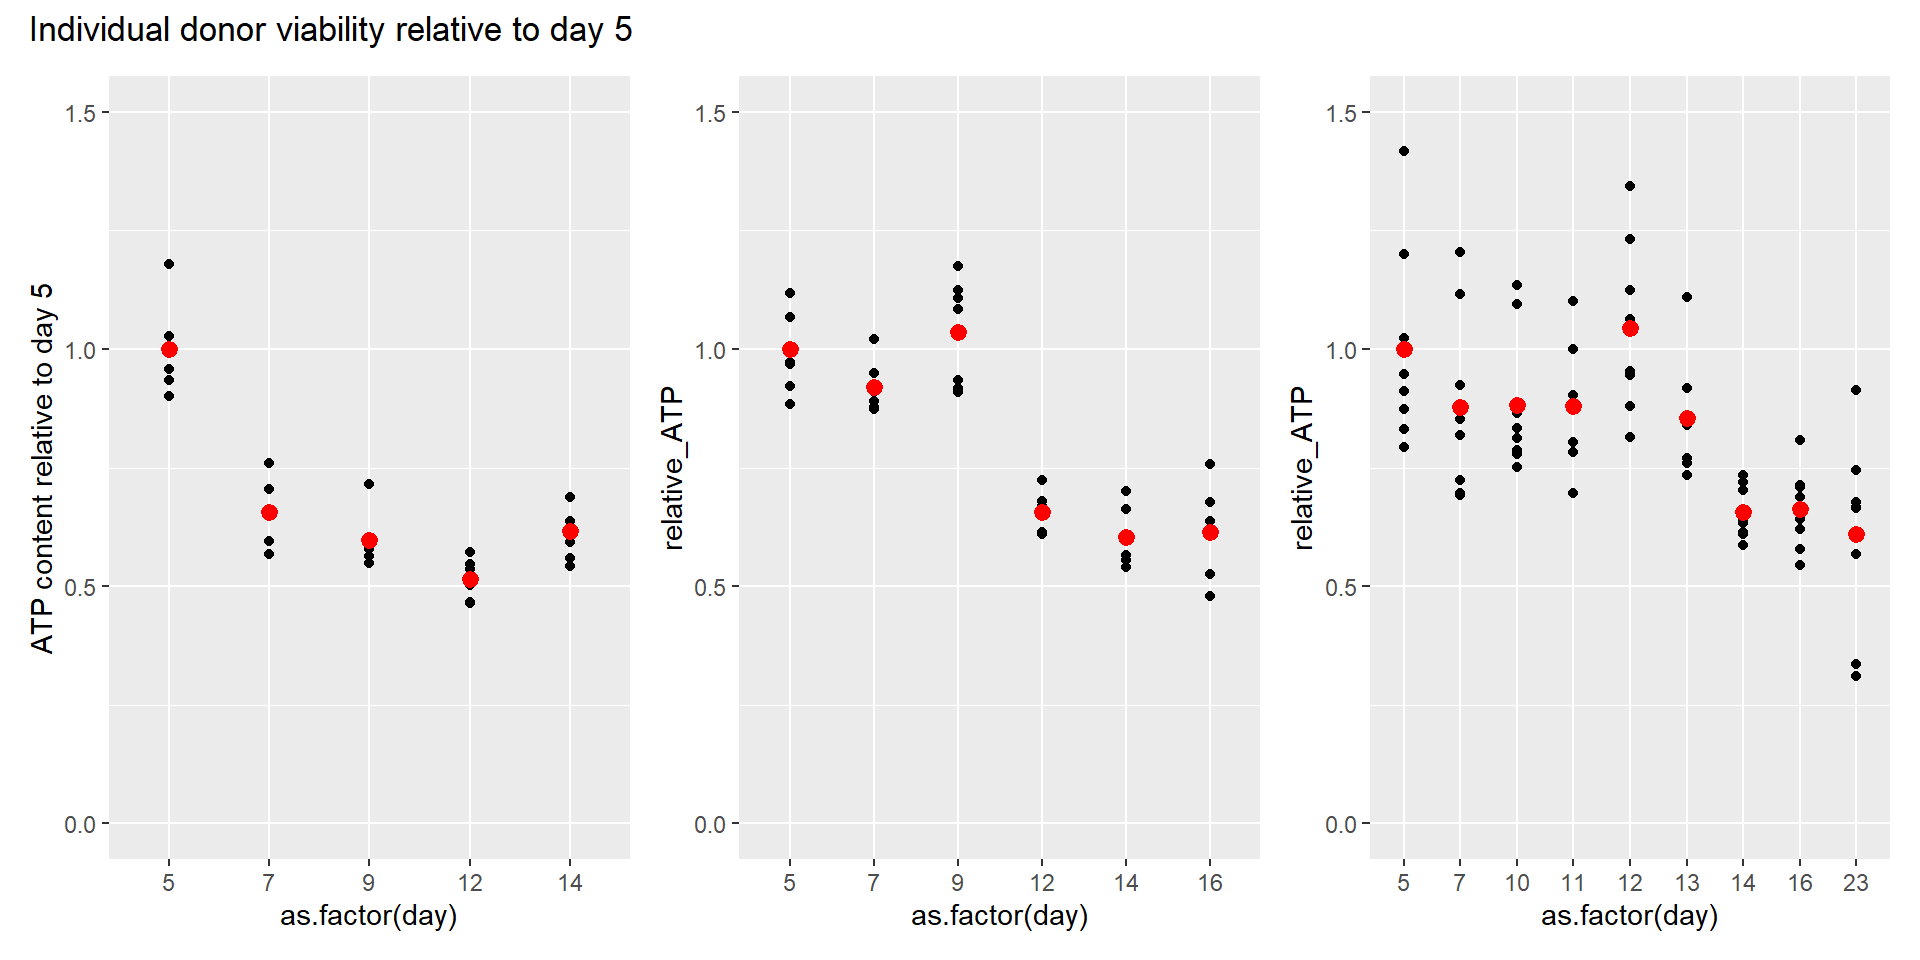

In [ ]:
#| label: fig-donor-viabilities
#| fig-width: 10
#| fig-height: 5

plot_donor_relative_viability